In [1]:
import numpy as np
import pandas as pd
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from keras.models import Model, Sequential
from keras.layers import Dense,BatchNormalization,Conv2D, Conv1D
from keras.layers import Input,GlobalMaxPooling2D,concatenate, GlobalMaxPooling1D, Flatten
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint
from os import listdir, getcwd, chdir
from os.path import isfile, join

In [2]:
workbookDir = getcwd()
print('Current Notebook Dir: ' + workbookDir)
chdir(workbookDir) # Go to current workbook Dir"
chdir('..')        # Go up one
print(f'Using current directory for loading data: {getcwd()}')
workbookDir = getcwd()

Current Notebook Dir: /Users/nelsschimek/Documents/nancelab/diff_predictor/notebooks
Using current directory for loading data: /Users/nelsschimek/Documents/nancelab/diff_predictor


In [3]:
data_path = '../diff_predictor/data/Brendan_traj_data/cortex_10div_msds/'
one_um_filelist = [f for f in listdir(data_path) if isfile(join(data_path, f)) and '1uM' in f]
nt_filelist = [f for f in listdir(data_path) if isfile(join(data_path, f)) and 'NT' in f]

print((nt_filelist)) #Check to make sure there are the right number of files, in this case 180 - 60 per class
one_um_filelist

['msd_P10F_NT_10DIV_40nm_slice_2_cortex_vid_1.csv', 'msd_P10F_NT_10DIV_40nm_slice_2_cortex_vid_2.csv', 'msd_P10F_NT_10DIV_40nm_slice_1_cortex_vid_2.csv', 'msd_P10F_NT_10DIV_40nm_slice_1_cortex_vid_1.csv']


['msd_P10F_1uM_10DIV_40nm_slice_2_cortex_vid_2.csv',
 'msd_P10F_1uM_10DIV_40nm_slice_1_cortex_vid_2.csv',
 'msd_P10F_1uM_10DIV_40nm_slice_1_cortex_vid_1.csv',
 'msd_P10F_1uM_10DIV_40nm_slice_2_cortez_vid_1.csv']

In [8]:
filelist[0]

'msd_HYase_brain_2_slice_3_vid_4.csv'

In [4]:
label = np.zeros([64,1])
label.shape

(64, 1)

In [5]:
out = np.zeros([64,100-1,1])
out.shape

(64, 99, 1)

In [6]:
partition = {
    'train': df['Track_ID'].unique()
}

NameError: name 'df' is not defined

In [6]:
df

,Unnamed: 0,Frame,Track_ID,X,Y,MSDs,Gauss,Quality,SN_Ratio,Mean_Intensity
0,0,0.0,0.0,143.975957,1666.191059,0.000000,0.000000,6.404266,0.860123,423.410853
1,1,1.0,0.0,143.986696,1665.273117,32.486171,0.969994,5.993530,0.733718,417.085271
2,2,2.0,0.0,137.519711,1664.689652,59.047953,0.548953,7.272522,0.771280,425.503876
3,3,3.0,0.0,138.059675,1664.788500,53.342281,0.652197,7.529022,0.949320,426.705426
4,4,4.0,0.0,134.721297,1667.048435,29.955698,0.985126,7.815430,0.933738,431.596899
...,...,...,...,...,...,...,...,...,...,...
2339689,279274,646.0,3593.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2339690,279275,647.0,3593.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2339691,279276,648.0,3593.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2339692,279277,649.0,3593.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
partition = dict()

In [4]:
training_filelist = one_um_filelist[0:3] + nt_filelist[0:3]
print(len(training_filelist))

6


In [31]:
#set up training files and labels

lengths = []

track_ids = []
training_labels = dict()
for file in training_filelist:

    df = pd.read_csv(data_path + file)

    for track_id in df['Track_ID'].unique():
        label = file[:-4] + f'_track_{int(track_id)}'
        if "NT" in file:
            training_labels[str(label)] = 1
        elif "uM" in file:
            training_labels[str(label)] = 0
        
        track_data = df[df['Track_ID']==track_id][['X', 'Y']]
        track_data = track_data.fillna(0)
    #     #dataset[str(track_id)] = np.array(track_data)

        test_array = np.array(track_data)
        #norm_array = normalize(test_array)
        # print(np.count_nonzero(test_array))
        # lengths.append(len(test_array))
        #print(np.count_nonzero(np.isnan(test_array)))
        if np.count_nonzero(test_array) >200:
            print(np.count_nonzero(test_array))
            track_ids.append(str(label))
            #np.save(str(f'data/10div_train_min50steps/{file}').replace(".csv", f"_track_{int(track_id)}"), test_array)

partition['train'] = track_ids
   

558
332
680
382
276
238
246
260
720
732
208
388
302
324
324
262
224
298
450
1302
758
658
1302
224
512
220
1092
228
220
290
234
284
330
494
260
448
424
384
268
286
262
1302
1114
1302
326
372
530
766
782
648
402
304
278
490
228
1302
1302
1302
404
250
1022
352
326
668
822
426
218
326
504
284
270
288
650
612
338
342
298
300
280
250
268
242
248
1302
772
218
1302
332
792
284
712
420
506
224
634
244
578
208
238
216
1302
1302
1302
1302
1302
272
310
266
202
290
258
1290
702
264
296
290
280
202
468
500
226
222
208
630
486
300
540
354
1302
802
1218
554
548
804
238
202
316
208
226
264
252
260
346
272
306
206
484
660
1302
1302
212
266
1302
1302
1302
408
1242
300
234
510
238
318
364
234
790
740
676
588
370
640
224
352
310
278
236
272
1302
274
430
1300
224
202
230
212
250
224
264
222
1058
540
258
204
442
804
278
324
748
258
242
650
638
346
314
246
218
602
278
1302
464
350
1292
806
1202
512
304
278
968
324
376
330
820
218
356
284
826
412
266
594
242
480
234
280
266
226
228
214
726
1302
444
1302
1302
5

In [44]:
array_lengths = np.array(lengths)
print(len(array_lengths))
np.count_nonzero(array_lengths>50)

9493


2580

In [8]:
validation_filelist = one_um_filelist[3:] + nt_filelist[3:]
print(len(validation_filelist))

2


In [32]:
#set up validation files and labels

track_ids = []
validation_labels = dict()
for file in validation_filelist:

    df = pd.read_csv(data_path + file)

    for track_id in df['Track_ID'].unique():
        label = file[:-4] + f'_track_{int(track_id)}'
        if "NT" in file:
            validation_labels[str(label)] = 1
        else:
            validation_labels[str(label)] = 0
        
        track_data = df[df['Track_ID']==track_id][['X', 'Y']]
        track_data = track_data.fillna(0)
    #     #dataset[str(track_id)] = np.array(track_data)
        test_array = np.array(track_data)
        #norm_array = normalize(test_array)
        if np.count_nonzero(test_array) >200:
            track_ids.append(str(label))
            #np.save(str(f'data/10div_val_min50steps/{file}').replace(".csv", f"_track_{int(track_id)}"), test_array)

partition['validation'] = track_ids

In [135]:
test_array[:,0]

array([1844.366 , 1842.252 , 1837.957 , 1833.662 , 1838.374 , 1837.425 ,
       1837.8095, 1838.194 , 1842.077 , 1836.455 , 1837.564 , 1837.899 ,
       1841.94  , 1838.605 , 1844.899 , 1848.569 ])

In [10]:
cnn_data_path = '../diff_predictor/data/10div_training_data/'
one_um_filelist = [f for f in listdir(cnn_data_path) if isfile(join(cnn_data_path, f)) and '1uM' in f]

nt_filelist = [f for f in listdir(cnn_data_path) if isfile(join(cnn_data_path, f)) and 'NT' in f]
len(one_um_filelist)

18094

In [27]:
out = out[out!=0]
out.shape

(364,)

In [30]:
counter = 0


26


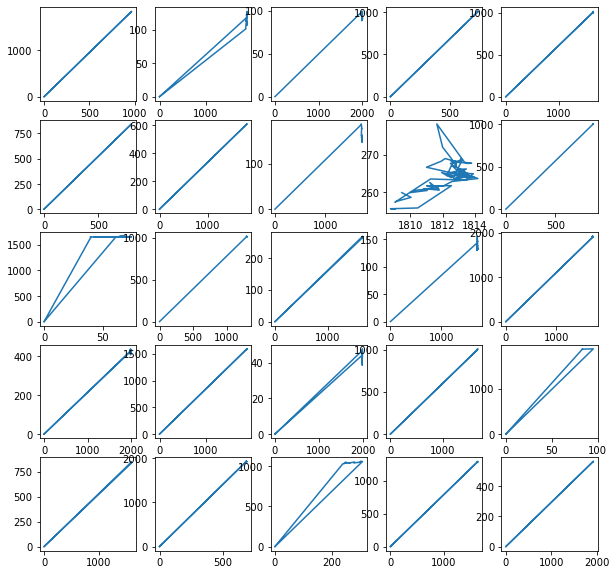

In [36]:
fig, axes = plt.subplots(5, 5, figsize=(10,10))
for i in range(5):
    for j in range(5):
        file = np.load(cnn_data_path+one_um_filelist[counter])
        if np.count_nonzero(file) >0:
            counter += 1
            axes[i,j].plot(file[:,0], file[:,1])
print(counter)

51


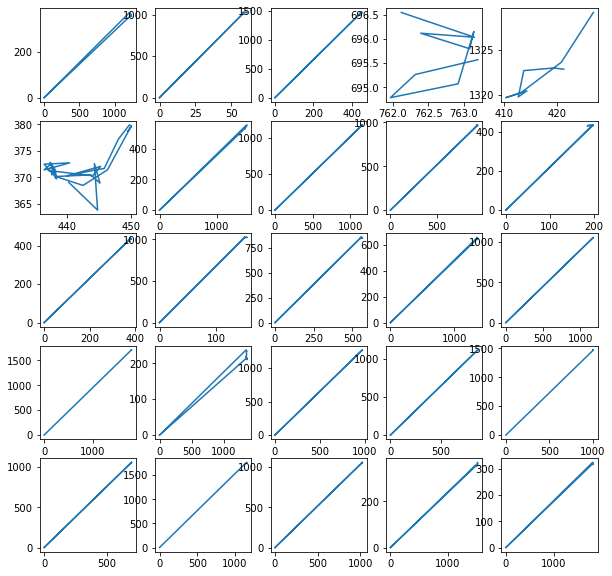

In [37]:
fig, axes = plt.subplots(5, 5, figsize=(10,10))
for i in range(5):
    for j in range(5):
        file = np.load(cnn_data_path+nt_filelist[counter])
        counter += 1
        axes[i,j].plot(file[:,0], file[:,1])
print(counter)

In [62]:
partition.keys

<function dict.keys>

In [10]:
dataset[track_ids[0]]

array([[ 143.97595688, 1666.19105945],
       [ 143.98669615, 1665.27311675],
       [ 137.51971108, 1664.68965163],
       ...,
       [          nan,           nan],
       [          nan,           nan],
       [          nan,           nan]])

In [13]:
class MptDataGenerator(keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, data_path, list_IDs, labels, batch_size=8, dim=(651,2), n_channels=None,
                 n_classes=2, shuffle=True):
        'Initialization'
        self.dim = dim
        self.batch_size = batch_size
        self.labels = labels
        self.list_IDs = list_IDs
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.data_path = data_path
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]

        # Generate data
        X, y = self.__data_generation(list_IDs_temp)

        return X, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, list_IDs_temp):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        X = np.empty((self.batch_size, *self.dim))#, self.n_channels))
        y = np.empty((self.batch_size), dtype=int)

        # Generate data
        for i, ID in enumerate(list_IDs_temp):
            # Store sample
            out_array = np.load(self.data_path + ID + '.npy')
            out_array = normalize(out_array)
            X[i,] = out_array

            # Store class
            y[i] = self.labels[ID]

        return X, keras.utils.to_categorical(y, num_classes=self.n_classes)


In [14]:
training_labels

{'msd_P10F_1uM_10DIV_40nm_slice_2_cortex_vid_2_track_0': 0,
 'msd_P10F_1uM_10DIV_40nm_slice_2_cortex_vid_2_track_1': 0,
 'msd_P10F_1uM_10DIV_40nm_slice_2_cortex_vid_2_track_2': 0,
 'msd_P10F_1uM_10DIV_40nm_slice_2_cortex_vid_2_track_3': 0,
 'msd_P10F_1uM_10DIV_40nm_slice_2_cortex_vid_2_track_4': 0,
 'msd_P10F_1uM_10DIV_40nm_slice_2_cortex_vid_2_track_5': 0,
 'msd_P10F_1uM_10DIV_40nm_slice_2_cortex_vid_2_track_6': 0,
 'msd_P10F_1uM_10DIV_40nm_slice_2_cortex_vid_2_track_7': 0,
 'msd_P10F_1uM_10DIV_40nm_slice_2_cortex_vid_2_track_8': 0,
 'msd_P10F_1uM_10DIV_40nm_slice_2_cortex_vid_2_track_9': 0,
 'msd_P10F_1uM_10DIV_40nm_slice_2_cortex_vid_2_track_10': 0,
 'msd_P10F_1uM_10DIV_40nm_slice_2_cortex_vid_2_track_11': 0,
 'msd_P10F_1uM_10DIV_40nm_slice_2_cortex_vid_2_track_12': 0,
 'msd_P10F_1uM_10DIV_40nm_slice_2_cortex_vid_2_track_13': 0,
 'msd_P10F_1uM_10DIV_40nm_slice_2_cortex_vid_2_track_14': 0,
 'msd_P10F_1uM_10DIV_40nm_slice_2_cortex_vid_2_track_15': 0,
 'msd_P10F_1uM_10DIV_40nm_slice_2_

In [33]:
training_generator = MptDataGenerator('../diff_predictor/data/10div_train_min50steps/', partition['train'], training_labels)

In [34]:
validation_generator = MptDataGenerator('../diff_predictor/data/10div_val_min50steps/', partition['validation'], validation_labels)

In [35]:
inputs = Input((651, 2))
initializer = 'he_normal'
f = 32

In [15]:
x1 = Conv1D(f,4,padding='causal',activation='relu',kernel_initializer=initializer)(inputs)
x1 = BatchNormalization()(x1)
x1 = Conv1D(f,4,dilation_rate=2,padding='causal',activation='relu',kernel_initializer=initializer)(x1)
x1 = BatchNormalization()(x1)
x1 = Conv1D(f,4,dilation_rate=4,padding='causal',activation='relu',kernel_initializer=initializer)(x1)
x1 = BatchNormalization()(x1)
x1 = GlobalMaxPooling1D()(x1)

dense = Dense(512,activation='relu')(x1)
dense = Dense(256,activation='relu')(dense)
dense2 = Dense(2,activation='softmax')(dense)
model = Model(inputs=inputs, outputs=dense2)

In [36]:
x1 = Conv1D(f,4,padding='causal',activation='relu',kernel_initializer=initializer)(inputs)
x1 = BatchNormalization()(x1)
x1 = Conv1D(f,4,dilation_rate=2,padding='causal',activation='relu',kernel_initializer=initializer)(x1)
x1 = BatchNormalization()(x1)
x1 = Conv1D(f,4,dilation_rate=4,padding='causal',activation='relu',kernel_initializer=initializer)(x1)
x1 = BatchNormalization()(x1)
x1 = GlobalMaxPooling1D()(x1)


x2 = Conv1D(f,2,padding='causal',activation='relu',kernel_initializer=initializer)(inputs)
x2 = BatchNormalization()(x2)
x2 = Conv1D(f,2,dilation_rate=2,padding='causal',activation='relu',kernel_initializer=initializer)(x2)
x2 = BatchNormalization()(x2)
x2 = Conv1D(f,2,dilation_rate=4,padding='causal',activation='relu',kernel_initializer=initializer)(x2)
x2 = BatchNormalization()(x2)
x2 = GlobalMaxPooling1D()(x2)


x3 = Conv1D(f,3,padding='causal',activation='relu',kernel_initializer=initializer)(inputs)
x3 = BatchNormalization()(x3)
x3 = Conv1D(f,3,dilation_rate=2,padding='causal',activation='relu',kernel_initializer=initializer)(x3)
x3 = BatchNormalization()(x3)
x3 = Conv1D(f,3,dilation_rate=4,padding='causal',activation='relu',kernel_initializer=initializer)(x3)
x3 = BatchNormalization()(x3)
x3 = GlobalMaxPooling1D()(x3)


x4 = Conv1D(f,10,padding='causal',activation='relu',kernel_initializer=initializer)(inputs)
x4 = BatchNormalization()(x4)
x4 = Conv1D(f,10,dilation_rate=4,padding='causal',activation='relu',kernel_initializer=initializer)(x4)
x4 = BatchNormalization()(x4)
x4 = Conv1D(f,10,dilation_rate=8,padding='causal',activation='relu',kernel_initializer=initializer)(x4)
x4 = BatchNormalization()(x4)
x4 = GlobalMaxPooling1D()(x4)


x5 = Conv1D(f,20,padding='same',activation='relu',kernel_initializer=initializer)(inputs)
x5 = BatchNormalization()(x5)
x5 = GlobalMaxPooling1D()(x5)


con = concatenate([x1,x2,x3,x4,x5])
dense = Dense(512,activation='relu')(con)
dense = Dense(128,activation='relu')(dense)
dense2 = Dense(2,activation='softmax')(dense)
model = Model(inputs=inputs, outputs=dense2)

##optimizer = Adam(lr=1e-5)
#model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['acc'])
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 651, 2)]     0                                            
__________________________________________________________________________________________________
conv1d_52 (Conv1D)              (None, 651, 32)      288         input_4[0][0]                    
__________________________________________________________________________________________________
conv1d_55 (Conv1D)              (None, 651, 32)      160         input_4[0][0]                    
__________________________________________________________________________________________________
conv1d_58 (Conv1D)              (None, 651, 32)      224         input_4[0][0]                    
____________________________________________________________________________________________

In [18]:
model = Sequential()
model.add(Flatten())
model.add(Dense(1000, input_dim=inputs, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

# con = concatenate([x1,x2,x3,x4])
# dense = Dense(512,activation='relu')(con)
# dense = Dense(256#,activation='relu')(dense)
# dense2 = Dense(1,activation='sigmoid')(dense)
# model = Model(inputs=inputs, outputs=dense2)

# optimizer = Adam(lr=1e-5)
# model.compile(optimizer=optimizer,loss='mse',metrics=['mse'])


In [37]:
model.compile(loss='mse',
              optimizer=Adam(lr=1e-5),
              metrics=['mse', 'accuracy'])

model.fit(training_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
178/178 [==============================] - ETA: 0s - loss: 0.2894 - mse: 0.2894 - accuracy: 0.6524WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f963b0df7a0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`

In [90]:
results = model.predict(validation_generator, batch_size=32)

In [92]:
results

array([[0.4889007 ],
       [0.49449733],
       [0.49654898],
       ...,
       [0.49573073],
       [0.50216496],
       [0.48933476]], dtype=float32)

In [36]:
from sklearn.preprocessing import scale
output = scale()
output

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass copy=[[1391.73667658  957.40513897]
 [1385.86589585  960.40309034]
 [1388.45653238  960.29137335]
 ...
 [          nan           nan]
 [          nan           nan]
 [          nan           nan]] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


StandardScaler(copy=array([[1391.73667658,  957.40513897],
       [1385.86589585,  960.40309034],
       [1388.45653238,  960.29137335],
       ...,
       [          nan,           nan],
       [          nan,           nan],
       [          nan,           nan]]))

In [55]:
x_y = np.array(df[df['Track_ID']== 1][['X', 'Y']])
x_y

array([[ 267.32757102, 1641.40302581],
       [ 268.89339992, 1641.86021464],
       [ 270.08193873, 1642.08710289],
       ...,
       [          nan,           nan],
       [          nan,           nan],
       [          nan,           nan]])

In [ ]:
norm = np.linalg.norm(x_y, 1)
im = x_y/norm
plt.figure(figsize=(10,500))
plt.imshow(im)

In [66]:
x_y[:2,:]

array([[ 267.32757102, 1641.40302581],
       [ 268.89339992, 1641.86021464]])

In [75]:
def scale_array(A):
    return (A-np.min(A))/(np.max(A) - np.min(A))

output = scale_array(x_y[:19,:])
output

array([[0.        , 0.99881681],
       [0.0011382 , 0.99914914],
       [0.00200215, 0.99931406],
       [0.00186857, 0.99857293],
       [0.00198115, 0.99877591],
       [0.00222902, 1.        ],
       [0.00208032, 0.99915327],
       [0.00174777, 0.99917532],
       [0.00142778, 0.99879495],
       [0.00183042, 0.99753842],
       [0.00223305, 0.99628188],
       [0.00263569, 0.99502534],
       [0.00303833, 0.99376881],
       [0.00344097, 0.99251227],
       [0.00384361, 0.99125574],
       [0.00424624, 0.9899992 ],
       [0.00464888, 0.98874266],
       [0.0044428 , 0.98914569],
       [0.0051891 , 0.98822241]])

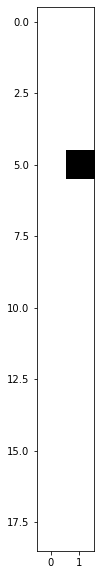

In [77]:
import cv2
%matplotlib inline
im = np.array(output).astype('uint8')
plt.figure(figsize=(10,10))
plt.imshow(im, cmap='Greys')
# grayImage = cv2.cvtColor(uint_img, cv2.COLOR_GRAY2BGR)
# cv2.imshow(mat=grayImage)

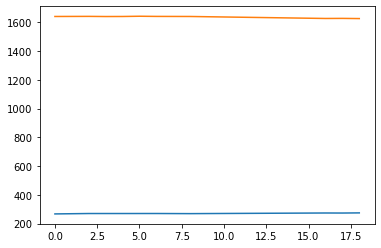

In [109]:
plt.plot(x_y)

In [64]:
def traj_generator(batch_size, datapath):
    out = np.zeros([batch_size, 651, 2]) #initialize trajectory array
    label = np.zeros([batch_size, 1]) #initialize label array
    batch_count = 0
    while True:
        df = pd.read_csv(datapath)
        for i in range(batch_size):
            batch_count += 1
            x_y = np.array(df[df['Track_ID']==i][['X', 'Y']])
            out[i,:,:] = x_y
            label[i] = 1
        yield out, label


In [42]:
inputs = Input((651, 2))
initializer = 'random_normal'
f = 32

In [43]:
x1 = Conv1D(f,4,padding='causal',activation='relu',kernel_initializer=initializer)(inputs)
x1 = BatchNormalization()(x1)
x1 = Conv1D(f,4,dilation_rate=2,padding='causal',activation='relu',kernel_initializer=initializer)(x1)
x1 = BatchNormalization()(x1)
x1 = Conv1D(f,4,dilation_rate=4,padding='causal',activation='relu',kernel_initializer=initializer)(x1)
x1 = BatchNormalization()(x1)
x1 = GlobalMaxPooling1D()(x1)


x2 = Conv1D(f,2,padding='causal',activation='relu',kernel_initializer=initializer)(inputs)
x2 = BatchNormalization()(x2)
x2 = Conv1D(f,2,dilation_rate=2,padding='causal',activation='relu',kernel_initializer=initializer)(x2)
x2 = BatchNormalization()(x2)
x2 = Conv1D(f,2,dilation_rate=4,padding='causal',activation='relu',kernel_initializer=initializer)(x2)
x2 = BatchNormalization()(x2)
x2 = GlobalMaxPooling1D()(x2)


x3 = Conv1D(f,3,padding='causal',activation='relu',kernel_initializer=initializer)(inputs)
x3 = BatchNormalization()(x3)
x3 = Conv1D(f,3,dilation_rate=2,padding='causal',activation='relu',kernel_initializer=initializer)(x3)
x3 = BatchNormalization()(x3)
x3 = Conv1D(f,3,dilation_rate=4,padding='causal',activation='relu',kernel_initializer=initializer)(x3)
x3 = BatchNormalization()(x3)
x3 = GlobalMaxPooling1D()(x3)


x4 = Conv1D(f,10,padding='causal',activation='relu',kernel_initializer=initializer)(inputs)
x4 = BatchNormalization()(x4)
x4 = Conv1D(f,10,dilation_rate=5,padding='causal',activation='relu',kernel_initializer=initializer)(x4)
x4 = BatchNormalization()(x4)
x4 = Conv1D(f,10,dilation_rate=10,padding='causal',activation='relu',kernel_initializer=initializer)(x4)
x4 = BatchNormalization()(x4)
x4 = GlobalMaxPooling1D()(x4)

con = concatenate([x1,x2,x3,x4])
dense = Dense(512,activation='relu')(con)
dense = Dense(256,activation='relu')(dense)
dense2 = Dense(1,activation='sigmoid')(dense)
model = Model(inputs=inputs, outputs=dense2)

optimizer = Adam(lr=1e-5)
model.compile(optimizer=optimizer,loss='mse',metrics=['mse', 'accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 651, 2)]     0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 651, 32)      288         input_3[0][0]                    
__________________________________________________________________________________________________
conv1d_3 (Conv1D)               (None, 651, 32)      160         input_3[0][0]                    
__________________________________________________________________________________________________
conv1d_6 (Conv1D)               (None, 651, 32)      224         input_3[0][0]                    
______________________________________________________________________________________________

In [10]:
model = Sequential()
model.add(Dense(16, input_dim=1, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

In [15]:
model.compile(loss='mean_absolute_error',
              optimizer=Adam(),
              metrics=['mean_squared_error'])

In [44]:
model.compile(loss='mean_absolute_error',
              optimizer=Adam(),
              metrics=['mean_squared_error', 'accuracy'])

model.fit(training_generator, epochs=2, validation_data=validation_generator)

Epoch 1/2
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
296/296 [==============================] - ETA: 0s - loss: 0.5000 - mean_squared_error: 0.3234 - accuracy: 0.5000WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7feab3ca8560> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH